In [1]:
from qulacs import QuantumCircuit, qubit_bloch_state
from qulacs.gate import Measurement, Identity, Adaptive, X, Z, Separator

# テレポーテーション回路
n = 3
circuit = QuantumCircuit(n)
circuit.add_H_gate(1)
circuit.add_CNOT_gate(1, 2)
circuit.add_CNOT_gate(0, 1)
circuit.add_H_gate(0)
circuit.add_gate(Separator(0, 2))   # ゲートの表示位置を調整(Identityと同じ)
circuit.add_gate(Measurement(0, 0)) # qubit0 -> classical register 0
circuit.add_gate(Measurement(1, 1)) # qubit1 -> classical register 1
circuit.add_gate(Adaptive(X(2), lambda cr: cr[1] == 1)) # cr == classical register
circuit.add_gate(Adaptive(Z(2), lambda cr: cr[0] == 1))

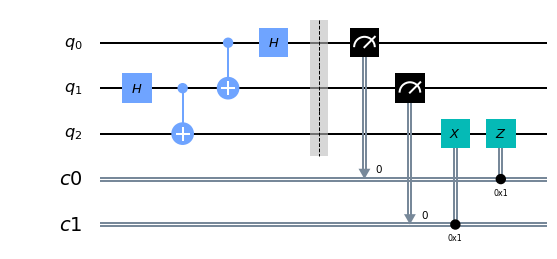

In [2]:
circuit.figure().draw('mpl')

In [3]:
print(circuit.to_qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c0[1];
creg c1[1];
h q[1];
cx q[1],q[2];
cx q[0],q[1];
h q[0];
barrier q[0],q[1],q[2];
measure q[0] -> c0;
measure q[1] -> c1;
if(c1==1) x q[2];
if(c0==1) z q[2];


In [4]:
from qulacs import QuantumState
import numpy as np

state = QuantumState(n)

# 乱数で qubit0 を初期化
stv = np.random.random(2) + np.random.random(2) * 1j
# qubit2, 3 は |0> に設定
stv = np.append(stv, [0]*(2**n - 2))
state.load(stv)
state.normalize(state.get_squared_norm())
stv0 = state.get_vector()

# update
circuit.update_quantum_state(state)

# result
stv1 = state.get_vector()

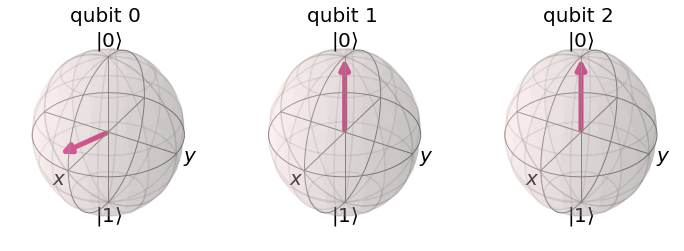

In [5]:
from qiskit.visualization import plot_bloch_multivector

# 各 qubit の初期状態 
plot_bloch_multivector(stv0)

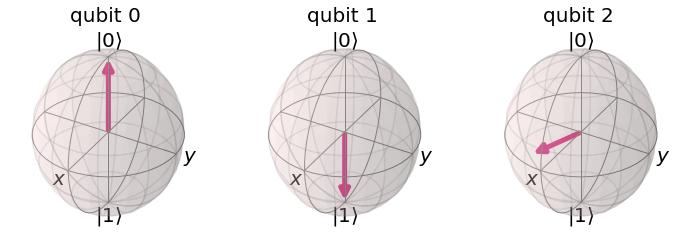

In [6]:
# テレポーテーション後の状態
plot_bloch_multivector(stv1)

In [7]:
# 初期状態での qubit0 の Bloch sphere vector
print(qubit_bloch_state(stv0)[0])
# テレポーテーション後の qubit2 の状態
print(qubit_bloch_state(stv1)[2])

[0.9765528578745954, -0.15147881017303919, 0.1529662898991831]
[0.9765528578745954, -0.15147881017303919, 0.1529662898991831]
